Create an .ipynb that processes the used_car_auction dataset and creates a Decision Tree model to predict Bad Buys. The following steps are required:\
Import data and inspect \
Remove variables with high null counts or low predictive power\
Change variable types if necessary\
##Feature engineering - create the following variables:\
Price Difference (MMR - VehBCost; negative values indicates a "good deal")\
Miles Per Year (VehOdo/ VehicleAge)\
Warranty Percent of Cost (WarrantyCost / VehBCost)\
Vehicle Type (use replace function on Size: Car/Truck/SUV/Van)\
Remove values of categorical variables with low observation counts\
Replace any null values according to best practices\
Create dummy variables\
Build, evaluate and refine a Decision Tree model to explain how to avoid purchasing Bad Buys.\ Note: in the DecisionTreeClassifer() function, set the parameter class_weights='balanced'. This is needed when your response variable has a much higher count of one value. If you do not change this setting, you will notice very poor performance from your model (it may fail to predict any bad buys).

This is repeated at the bottom as well:\
My first model had 50 columns and I dropped it to 33. They ran the same tree. Then, I changed my test_size and it was still quite close.\
\
If a vehicle is less than 4.5 years old, it's a good buy.\
If less than 4.5 and not a chevy there is a 57% it is good\
if less than 4.5 and a chevy it's a 72% chance it's good buy.\
\
If it is more than 4.5 years old it's a bad buy\
If more than 4.5yo and the warranty% is less than or equal to 37.42% then there's a 58% chance it will be a bad buy\
If more than 4.5 yo and the warranty% is more than 37.42 then there's 77% chance it will be a bad buy.\
Although the false positives are higher than I would like, it leads to prudent purchasing behavior.

In [1]:
import pandas as pd
import sklearn as sk

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Import scikit-learn metrics module for model performance output
from sklearn import metrics 

# Import the tree module
from sklearn import tree

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = 'C:\\Users\\stoli\\Documents\\BAS 221 Pollina Not One Drive\\'

In [3]:
usedcar = pd.read_csv(path + 'BAS_221_used_car_auction.csv')

In [4]:
usedcar.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,TopThree AmericanName,MMR Current AvgPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,FORD,3713.0,NaN,NaN,19638,33619,FL,4500.0,0,825
1,16,0,12/14/2009,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,GM,2128.0,NaN,NaN,5546,33619,FL,3300.0,0,1455
2,19,0,12/14/2009,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,GM,4107.0,NaN,NaN,19638,33619,FL,5700.0,0,1703
3,23,0,12/21/2009,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,GM,2446.0,NaN,NaN,5546,33619,FL,4100.0,0,5613
4,42,1,1/4/2010,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,OTHER,4522.0,NaN,NaN,19638,33619,FL,5200.0,0,594


In [5]:
usedcar.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR Current AvgPrice', 'PRIMEUNIT',
       'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')

In [6]:
usedcar.dtypes


RefId                      int64
IsBadBuy                   int64
PurchDate                 object
Auction                   object
VehYear                    int64
VehicleAge                 int64
Make                      object
Model                     object
Trim                      object
SubModel                  object
Color                     object
Transmission              object
WheelTypeID              float64
WheelType                 object
VehOdo                     int64
Nationality               object
Size                      object
TopThree AmericanName     object
MMR Current AvgPrice     float64
PRIMEUNIT                 object
AUCGUART                  object
BYRNO                      int64
VNZIP1                     int64
VNST                      object
VehBCost                 float64
IsOnlineSale               int64
WarrantyCost               int64
dtype: object

In [7]:
usedcar.shape

(7477, 27)

In [8]:
usedcar.isnull().sum()

RefId                       0
IsBadBuy                    0
PurchDate                   0
Auction                     0
VehYear                     0
VehicleAge                  0
Make                        0
Model                       0
Trim                      243
SubModel                    1
Color                       1
Transmission                1
WheelTypeID               325
WheelType                 325
VehOdo                      0
Nationality                 0
Size                        0
TopThree AmericanName       0
MMR Current AvgPrice       21
PRIMEUNIT                7113
AUCGUART                 7113
BYRNO                       0
VNZIP1                      0
VNST                        0
VehBCost                    0
IsOnlineSale                0
WarrantyCost                0
dtype: int64

In [9]:
usedcar.drop(columns=['PRIMEUNIT','AUCGUART'], inplace=True)

In [10]:
usedcar.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR Current AvgPrice', 'BYRNO', 'VNZIP1',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [11]:
usedcar.dtypes

RefId                      int64
IsBadBuy                   int64
PurchDate                 object
Auction                   object
VehYear                    int64
VehicleAge                 int64
Make                      object
Model                     object
Trim                      object
SubModel                  object
Color                     object
Transmission              object
WheelTypeID              float64
WheelType                 object
VehOdo                     int64
Nationality               object
Size                      object
TopThree AmericanName     object
MMR Current AvgPrice     float64
BYRNO                      int64
VNZIP1                     int64
VNST                      object
VehBCost                 float64
IsOnlineSale               int64
WarrantyCost               int64
dtype: object

In [12]:
usedcar.shape

(7477, 25)

In [13]:
usedcar.isnull().sum()

RefId                      0
IsBadBuy                   0
PurchDate                  0
Auction                    0
VehYear                    0
VehicleAge                 0
Make                       0
Model                      0
Trim                     243
SubModel                   1
Color                      1
Transmission               1
WheelTypeID              325
WheelType                325
VehOdo                     0
Nationality                0
Size                       0
TopThree AmericanName      0
MMR Current AvgPrice      21
BYRNO                      0
VNZIP1                     0
VNST                       0
VehBCost                   0
IsOnlineSale               0
WarrantyCost               0
dtype: int64

In [14]:
usedcar[0:20].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RefId,8,16,19,23,42,56,59,70,96,108,117,125,140,145,152,160,174,178,186,197
IsBadBuy,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
PurchDate,12/7/2009,12/14/2009,12/14/2009,12/21/2009,1/4/2010,1/18/2010,1/18/2010,1/25/2010,2/1/2010,2/15/2010,2/22/2010,2/22/2010,3/1/2010,3/1/2010,3/8/2010,3/15/2010,3/22/2010,3/22/2010,3/29/2010,4/5/2010
Auction,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA
VehYear,2005,2003,2005,2004,2005,2006,2004,2007,2004,2007,2007,2007,2006,2004,2001,2004,2003,2007,2006,2008
VehicleAge,4,6,4,5,5,4,6,3,6,3,3,3,4,6,9,6,7,3,4,2
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,SUZUKI,CHEVROLET,DODGE,DODGE,PONTIAC,SUZUKI,DODGE,FORD,FORD,FORD,CHRYSLER,MITSUBISHI,DODGE
Model,TAURUS,CAVALIER 4C,IMPALA,VENTURE FWD V6,SENTRA,DURANGO 2WD V8,PACIFICA FWD,FORENZA,TRACKER 2WD V6,1500 RAM PICKUP 2WD,MAGNUM V6,GRAND PRIX,FORENZA,1500 RAM PICKUP 2WD,MUSTANG V6,FOCUS,MUSTANG V6,PT CRUISER,ENDEAVOR FWD,CALIBER
Trim,SE,Bas,Bas,LS,Bas,SXT,NaN,NaN,LT,SLT,SE,Bas,NaN,ST,Bas,ZTW,Bas,Bas,LS,SE
SubModel,4D SEDAN SE,2D COUPE,4D SEDAN,PASSENGER 3.4L,4D SEDAN 1.8,4D SUV 4.7L,4D SPORT TOURER,4D SEDAN,4D SUV HARDTOP 2.5L LT,QUAD CAB 4.7L FFV BIG HORN,WAGON 2.7L,4D SEDAN,4D SEDAN,REG CAB 3.7L,2D COUPE,4D WAGON ZTW,2D COUPE,4D SEDAN,4D SPORT UTILITY LS,4D WAGON


In [15]:
usedcar.VehBCost.value_counts()

7500.0    73
7200.0    70
7000.0    64
6000.0    63
6500.0    61
          ..
9075.0     1
9615.0     1
9760.0     1
3390.0     1
3935.0     1
Name: VehBCost, Length: 1467, dtype: int64

In [16]:
usedcar.IsBadBuy.value_counts()

0    6540
1     937
Name: IsBadBuy, dtype: int64

In [17]:
usedcar1 = usedcar[['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR Current AvgPrice', 'BYRNO', 'VNZIP1',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']].copy()

In [18]:
usedcar1['PurchDate'] = pd.to_datetime(usedcar1['PurchDate'])

In [19]:
usedcar1.dtypes

RefId                             int64
IsBadBuy                          int64
PurchDate                datetime64[ns]
Auction                          object
VehYear                           int64
VehicleAge                        int64
Make                             object
Model                            object
Trim                             object
SubModel                         object
Color                            object
Transmission                     object
WheelTypeID                     float64
WheelType                        object
VehOdo                            int64
Nationality                      object
Size                             object
TopThree AmericanName            object
MMR Current AvgPrice            float64
BYRNO                             int64
VNZIP1                            int64
VNST                             object
VehBCost                        float64
IsOnlineSale                      int64
WarrantyCost                      int64


In [20]:
usedcar1.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,Nationality,Size,TopThree AmericanName,MMR Current AvgPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,8,0,2009-12-07,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,AMERICAN,MEDIUM,FORD,3713.0,19638,33619,FL,4500.0,0,825
1,16,0,2009-12-14,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,AMERICAN,COMPACT,GM,2128.0,5546,33619,FL,3300.0,0,1455
2,19,0,2009-12-14,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,AMERICAN,LARGE,GM,4107.0,19638,33619,FL,5700.0,0,1703
3,23,0,2009-12-21,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,AMERICAN,VAN,GM,2446.0,5546,33619,FL,4100.0,0,5613
4,42,1,2010-01-04,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,TOP LINE ASIAN,COMPACT,OTHER,4522.0,19638,33619,FL,5200.0,0,594


In [21]:
usedcar1.Make.value_counts()

CHEVROLET     1770
DODGE         1344
FORD          1133
CHRYSLER       901
PONTIAC        450
KIA            264
NISSAN         234
SATURN         208
JEEP           183
HYUNDAI        171
SUZUKI         133
MITSUBISHI     106
MAZDA          103
TOYOTA          97
MERCURY         87
BUICK           71
GMC             68
HONDA           53
VOLKSWAGEN      27
OLDSMOBILE      21
SCION           13
LINCOLN         11
ISUZU            7
SUBARU           7
INFINITI         3
ACURA            3
LEXUS            3
CADILLAC         3
VOLVO            2
MINI             1
Name: Make, dtype: int64

In [22]:
usedcar1.Model.value_counts()

PT CRUISER              251
IMPALA                  201
CALIBER                 150
TAURUS                  138
SEBRING 4C              126
                       ... 
FIREBIRD V6               1
ALTIMA 3.5L V6 MPI        1
AXIOM 2WD V6 3.5L V6      1
GALANT 4C Multiple E      1
SANTA FE 4WD V6 Unsp      1
Name: Model, Length: 618, dtype: int64

In [23]:
#Price Difference (MMR - VehBCost; negative values indicates a "good deal")
usedcar1['Price_Difference']= usedcar1['MMR Current AvgPrice']-usedcar1['VehBCost']
usedcar1

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,Size,TopThree AmericanName,MMR Current AvgPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference
0,8,0,2009-12-07,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,MEDIUM,FORD,3713.0,19638,33619,FL,4500.0,0,825,-787.0
1,16,0,2009-12-14,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,COMPACT,GM,2128.0,5546,33619,FL,3300.0,0,1455,-1172.0
2,19,0,2009-12-14,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,LARGE,GM,4107.0,19638,33619,FL,5700.0,0,1703,-1593.0
3,23,0,2009-12-21,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,VAN,GM,2446.0,5546,33619,FL,4100.0,0,5613,-1654.0
4,42,1,2010-01-04,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,COMPACT,OTHER,4522.0,19638,33619,FL,5200.0,0,594,-678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,72963,1,2009-10-07,ADESA,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,...,MEDIUM,CHRYSLER,5527.0,18881,30212,GA,6800.0,0,975,-1273.0
7473,72976,1,2009-11-18,ADESA,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,...,VAN,GM,2062.0,18111,30212,GA,4115.0,0,5913,-2053.0
7474,72998,0,2009-11-24,ADESA,2005,4,SUZUKI,FORENZA,S,4D SEDAN,...,MEDIUM,OTHER,3240.0,18881,30212,GA,5500.0,0,482,-2260.0
7475,73005,0,2009-11-24,ADESA,2006,3,CHRYSLER,300,Bas,4D SEDAN,...,SPECIALTY,CHRYSLER,8721.0,18111,30212,GA,7600.0,0,1215,1121.0


In [24]:
#Miles Per Year (VehOdo/ VehicleAge)

usedcar1['Miles_Per_Year']= usedcar1['VehOdo']/usedcar1['VehicleAge']
usedcar1.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,TopThree AmericanName,MMR Current AvgPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year
0,8,0,2009-12-07,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,FORD,3713.0,19638,33619,FL,4500.0,0,825,-787.0,16451.25
1,16,0,2009-12-14,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,GM,2128.0,5546,33619,FL,3300.0,0,1455,-1172.0,12022.00
2,19,0,2009-12-14,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,GM,4107.0,19638,33619,FL,5700.0,0,1703,-1593.0,16481.25
3,23,0,2009-12-21,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,GM,2446.0,5546,33619,FL,4100.0,0,5613,-1654.0,19626.00
4,42,1,2010-01-04,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,OTHER,4522.0,19638,33619,FL,5200.0,0,594,-678.0,17377.80


In [25]:
#Warranty Percent of Cost (WarrantyCost / VehBCost)

usedcar1['WarrantPercentOfCost']= 100*(usedcar1['WarrantyCost']/usedcar1['VehBCost'])


In [26]:
usedcar1.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMR Current AvgPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost
0,8,0,2009-12-07,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,3713.0,19638,33619,FL,4500.0,0,825,-787.0,16451.25,18.333333
1,16,0,2009-12-14,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,2128.0,5546,33619,FL,3300.0,0,1455,-1172.0,12022.00,44.090909
2,19,0,2009-12-14,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,4107.0,19638,33619,FL,5700.0,0,1703,-1593.0,16481.25,29.877193
3,23,0,2009-12-21,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,2446.0,5546,33619,FL,4100.0,0,5613,-1654.0,19626.00,136.902439
4,42,1,2010-01-04,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,4522.0,19638,33619,FL,5200.0,0,594,-678.0,17377.80,11.423077


In [27]:
#Vehicle Type (use replace function on Size: Car/Truck/SUV/Van)
#[['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
#       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
#       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
 #      'TopThree AmericanName', 'MMR Current AvgPrice', 'BYRNO', 'VNZIP1',
  #     'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']]
usedcar1.Size.value_counts()

MEDIUM         3130
MEDIUM SUV      864
LARGE           857
COMPACT         718
VAN             625
LARGE TRUCK     323
SMALL SUV       251
SPECIALTY       206
CROSSOVER       174
LARGE SUV       158
SPORTS           87
SMALL TRUCK      84
Name: Size, dtype: int64

def type(df):
    if df['Size'] == "SMALL" 
        or df['Size'] == "MEDIUM" 
            or df['Size'] == "LARGE"
                or df['Size'] == "COMPACT"
                    or df['Size'] == "SPORTS"
                        or df['Size'] == "SPECIALTY":
        return 'CAR'
    elif df['Size'] == "SMALL SUV" 
        or df['Size'] == "MEDIUM SUV" 
            or df['Size'] == "LARGE SUV"
                or df['Size'] == "CROSSOVER":
        return 'SUV'
    elif  df['Size'] == "SMALL TRUCK"
        or df['Size'] == "MEDIUM TRUCK"
             or df['Size'] == "LARGE TRUCK"
        return 'TRUCK'
    else: 
        return "OTHER"
 #one long runon sentence.       

In [28]:
usedcar1['VehicleType'] = usedcar1['Size']

In [29]:
usedcar1[0:10].T

,0,1,2,3,4,5,6,7,8,9
RefId,8,16,19,23,42,56,59,70,96,108
IsBadBuy,0,0,0,0,1,0,1,0,0,0
PurchDate,2009-12-07 00:00:00,2009-12-14 00:00:00,2009-12-14 00:00:00,2009-12-21 00:00:00,2010-01-04 00:00:00,2010-01-18 00:00:00,2010-01-18 00:00:00,2010-01-25 00:00:00,2010-02-01 00:00:00,2010-02-15 00:00:00
Auction,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA
VehYear,2005,2003,2005,2004,2005,2006,2004,2007,2004,2007
VehicleAge,4,6,4,5,5,4,6,3,6,3
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,SUZUKI,CHEVROLET,DODGE
Model,TAURUS,CAVALIER 4C,IMPALA,VENTURE FWD V6,SENTRA,DURANGO 2WD V8,PACIFICA FWD,FORENZA,TRACKER 2WD V6,1500 RAM PICKUP 2WD
Trim,SE,Bas,Bas,LS,Bas,SXT,NaN,NaN,LT,SLT
SubModel,4D SEDAN SE,2D COUPE,4D SEDAN,PASSENGER 3.4L,4D SEDAN 1.8,4D SUV 4.7L,4D SPORT TOURER,4D SEDAN,4D SUV HARDTOP 2.5L LT,QUAD CAB 4.7L FFV BIG HORN


In [30]:
usedcar1['VehicleType'].replace(['SMALL', 'MEDIUM', 'LARGE', 'COMPACT',
       'SPORTS', 'SPECIALTY'], 'CAR', inplace=True)

In [31]:
usedcar1['VehicleType'].replace(['SMALL SUV', 'MEDIUM SUV', 'LARGE SUV', 'CROSSOVER'], 'SUV', inplace=True)

In [32]:
usedcar1['VehicleType'].replace(['SMALL TRUCK', 'MEDIUM TRUCK', 'LARGE TRUCK'], 'TRUCK', inplace=True)

In [33]:
usedcar1[0:20].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
RefId,8,16,19,23,42,56,59,70,96,108,117,125,140,145,152,160,174,178,186,197
IsBadBuy,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
PurchDate,2009-12-07 00:00:00,2009-12-14 00:00:00,2009-12-14 00:00:00,2009-12-21 00:00:00,2010-01-04 00:00:00,2010-01-18 00:00:00,2010-01-18 00:00:00,2010-01-25 00:00:00,2010-02-01 00:00:00,2010-02-15 00:00:00,2010-02-22 00:00:00,2010-02-22 00:00:00,2010-03-01 00:00:00,2010-03-01 00:00:00,2010-03-08 00:00:00,2010-03-15 00:00:00,2010-03-22 00:00:00,2010-03-22 00:00:00,2010-03-29 00:00:00,2010-04-05 00:00:00
Auction,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA
VehYear,2005,2003,2005,2004,2005,2006,2004,2007,2004,2007,2007,2007,2006,2004,2001,2004,2003,2007,2006,2008
VehicleAge,4,6,4,5,5,4,6,3,6,3,3,3,4,6,9,6,7,3,4,2
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,SUZUKI,CHEVROLET,DODGE,DODGE,PONTIAC,SUZUKI,DODGE,FORD,FORD,FORD,CHRYSLER,MITSUBISHI,DODGE
Model,TAURUS,CAVALIER 4C,IMPALA,VENTURE FWD V6,SENTRA,DURANGO 2WD V8,PACIFICA FWD,FORENZA,TRACKER 2WD V6,1500 RAM PICKUP 2WD,MAGNUM V6,GRAND PRIX,FORENZA,1500 RAM PICKUP 2WD,MUSTANG V6,FOCUS,MUSTANG V6,PT CRUISER,ENDEAVOR FWD,CALIBER
Trim,SE,Bas,Bas,LS,Bas,SXT,NaN,NaN,LT,SLT,SE,Bas,NaN,ST,Bas,ZTW,Bas,Bas,LS,SE
SubModel,4D SEDAN SE,2D COUPE,4D SEDAN,PASSENGER 3.4L,4D SEDAN 1.8,4D SUV 4.7L,4D SPORT TOURER,4D SEDAN,4D SUV HARDTOP 2.5L LT,QUAD CAB 4.7L FFV BIG HORN,WAGON 2.7L,4D SEDAN,4D SEDAN,REG CAB 3.7L,2D COUPE,4D WAGON ZTW,2D COUPE,4D SEDAN,4D SPORT UTILITY LS,4D WAGON


In [34]:
#I ran this because I wasn't sure what specialty was...it's all cars.
uc1specialty = usedcar1[usedcar1.Size == 'SPECIALTY']
uc1specialty

In [35]:
uc1specialty.Model.value_counts()

In [36]:
usedcar1.VehicleType.value_counts()

CAR      4998
SUV      1447
VAN       625
TRUCK     407
Name: VehicleType, dtype: int64

In [37]:
usedcar1.isnull().sum()

RefId                      0
IsBadBuy                   0
PurchDate                  0
Auction                    0
VehYear                    0
VehicleAge                 0
Make                       0
Model                      0
Trim                     243
SubModel                   1
Color                      1
Transmission               1
WheelTypeID              325
WheelType                325
VehOdo                     0
Nationality                0
Size                       0
TopThree AmericanName      0
MMR Current AvgPrice      21
BYRNO                      0
VNZIP1                     0
VNST                       0
VehBCost                   0
IsOnlineSale               0
WarrantyCost               0
Price_Difference          21
Miles_Per_Year             0
WarrantPercentOfCost       0
VehicleType                0
dtype: int64

In [38]:
usedcar1.WheelType.value_counts()

Alloy      3745
Covers     3331
Special      76
Name: WheelType, dtype: int64

In [39]:
usedcar1.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR Current AvgPrice', 'BYRNO', 'VNZIP1',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Price_Difference',
       'Miles_Per_Year', 'WarrantPercentOfCost', 'VehicleType'],
      dtype='object')

In [40]:
usedcar1.rename(columns={'MMR Current AvgPrice': 'MMR_Current_AvgPrice'}, inplace=True)


In [41]:
usedcar2 = usedcar1.groupby(['VehicleType']).MMR_Current_AvgPrice.mean()
usedcar2

VehicleType
CAR      5871.328855
SUV      7376.242193
TRUCK    7005.293103
VAN      5315.493569
Name: MMR_Current_AvgPrice, dtype: float64

In [42]:
usedcar3 = pd.merge(
    usedcar1,
    usedcar2,
    how='left',
    on='VehicleType',
    sort=False,
    copy=True,
    indicator=False,
    validate=None)

In [43]:
usedcar3.T

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
RefId,8,16,19,23,42,56,59,70,96,108,...,72896,72901,72910,72921,72945,72963,72976,72998,73005,73014
IsBadBuy,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
PurchDate,2009-12-07 00:00:00,2009-12-14 00:00:00,2009-12-14 00:00:00,2009-12-21 00:00:00,2010-01-04 00:00:00,2010-01-18 00:00:00,2010-01-18 00:00:00,2010-01-25 00:00:00,2010-02-01 00:00:00,2010-02-15 00:00:00,...,2009-09-23 00:00:00,2009-09-23 00:00:00,2009-09-23 00:00:00,2009-09-30 00:00:00,2009-10-07 00:00:00,2009-10-07 00:00:00,2009-11-18 00:00:00,2009-11-24 00:00:00,2009-11-24 00:00:00,2009-12-02 00:00:00
Auction,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,...,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA,ADESA
VehYear,2005,2003,2005,2004,2005,2006,2004,2007,2004,2007,...,2006,2004,2007,2004,2006,2007,2001,2005,2006,2006
VehicleAge,4,6,4,5,5,4,6,3,6,3,...,3,5,2,5,3,2,8,4,3,3
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,SUZUKI,CHEVROLET,DODGE,...,DODGE,PONTIAC,DODGE,CHEVROLET,SUZUKI,CHRYSLER,PONTIAC,SUZUKI,CHRYSLER,MAZDA
Model,TAURUS,CAVALIER 4C,IMPALA,VENTURE FWD V6,SENTRA,DURANGO 2WD V8,PACIFICA FWD,FORENZA,TRACKER 2WD V6,1500 RAM PICKUP 2WD,...,STRATUS 4C 2.4L I4 S,GRAND AM V6 3.4L V6,MAGNUM V6 2.7L V6 MP,TRAILBLAZER 2WD 6C 4,FORENZA 2.0L I4 EFI,PT CRUISER 2.4L I4 S,MONTANA,FORENZA,300,MAZDA6
Trim,SE,Bas,Bas,LS,Bas,SXT,NaN,NaN,LT,SLT,...,SXT,SE,SE,Nor,NaN,Bas,NaN,S,Bas,s
SubModel,4D SEDAN SE,2D COUPE,4D SEDAN,PASSENGER 3.4L,4D SEDAN 1.8,4D SUV 4.7L,4D SPORT TOURER,4D SEDAN,4D SUV HARDTOP 2.5L LT,QUAD CAB 4.7L FFV BIG HORN,...,4D SEDAN,4D SEDAN SE1,WAGON 2.7L,4D SUV 4.2L LS,4D SEDAN,4D SEDAN,4D MINIVAN EXT 3.4L,4D SEDAN,4D SEDAN,4D SEDAN S


In [44]:
usedcar3['Adj_MMR_AvgPrice'] = usedcar3['MMR_Current_AvgPrice_x'].fillna(usedcar3.groupby('VehicleType')['MMR_Current_AvgPrice_x'].transform('mean')).copy()
usedcar3

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,VNST,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,MMR_Current_AvgPrice_y,Adj_MMR_AvgPrice
0,8,0,2009-12-07,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,FL,4500.0,0,825,-787.0,16451.250,18.333333,CAR,5871.328855,3713.0
1,16,0,2009-12-14,ADESA,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,...,FL,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,5871.328855,2128.0
2,19,0,2009-12-14,ADESA,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,...,FL,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,5871.328855,4107.0
3,23,0,2009-12-21,ADESA,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,...,FL,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,5315.493569,2446.0
4,42,1,2010-01-04,ADESA,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,...,FL,5200.0,0,594,-678.0,17377.800,11.423077,CAR,5871.328855,4522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,72963,1,2009-10-07,ADESA,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,...,GA,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5871.328855,5527.0
7473,72976,1,2009-11-18,ADESA,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,...,GA,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,5315.493569,2062.0
7474,72998,0,2009-11-24,ADESA,2005,4,SUZUKI,FORENZA,S,4D SEDAN,...,GA,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,5871.328855,3240.0
7475,73005,0,2009-11-24,ADESA,2006,3,CHRYSLER,300,Bas,4D SEDAN,...,GA,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,5871.328855,8721.0


In [45]:
usedcar3.Adj_MMR_AvgPrice.isnull().sum()

0

In [46]:
usedcar3.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR_Current_AvgPrice_x', 'BYRNO', 'VNZIP1',
       'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'Price_Difference',
       'Miles_Per_Year', 'WarrantPercentOfCost', 'VehicleType',
       'MMR_Current_AvgPrice_y', 'Adj_MMR_AvgPrice'],
      dtype='object')

In [47]:
usedcar4 = usedcar3.drop(columns=['RefId', 'PurchDate', 'Auction', 'WheelTypeID', 'WheelType', 
       'BYRNO', 'VNZIP1','VNST','MMR_Current_AvgPrice_y']).copy()
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,TopThree AmericanName,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,FORD,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,GM,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,GM,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,GM,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,OTHER,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,CHRYSLER,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,GM,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,OTHER,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,CHRYSLER,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0


In [48]:
usedcar4.Model.value_counts().head(10)

PT CRUISER              251
IMPALA                  201
CALIBER                 150
TAURUS                  138
SEBRING 4C              126
CARAVAN GRAND FWD V6    125
MALIBU 4C               117
TAURUS 3.0L V6 EFI      112
IMPALA V6               109
COBALT                  107
Name: Model, dtype: int64

In [49]:
usedcar4.Model.unique()

array(['TAURUS', 'CAVALIER 4C', 'IMPALA', 'VENTURE FWD V6', 'SENTRA',
       'DURANGO 2WD V8', 'PACIFICA FWD', 'FORENZA', 'TRACKER 2WD V6',
       '1500 RAM PICKUP 2WD', 'MAGNUM V6', 'GRAND PRIX', 'MUSTANG V6',
       'FOCUS', 'PT CRUISER', 'ENDEAVOR FWD', 'CALIBER',
       'TRAILBLAZER 2WD 6C', 'ION', 'EQUINOX FWD V6', 'REGAL',
       'MALIBU 4C', 'ELANTRA', 'STRATUS V6', 'RIO', 'DURANGO 2WD V6',
       'EXPEDITION 2WD V8', 'NEON', 'IMPALA V6', '300', 'SONATA V6',
       '1500 SILVERADO PICKU', 'SEBRING 4C', 'AVENGER V6',
       'CARAVAN GRAND FWD V6', 'MAZDA3', 'WINDSTAR FWD V6',
       'VENTURE AWD V6', 'MALIBU MAXX V6 3.5L', 'SONATA 4C 2.4L I4 MP',
       'ACCENT 1.6L I4 MPI', 'FORENZA 2.0L I4 EFI', 'MONTE CARLO 3.4L V6',
       'LIBERTY 4WD V6', 'PACIFICA AWD', 'TRAILBLAZER EXT 4WD', 'MAXIMA',
       'ENVOY XL 4WD 6C', 'ACCORD 4C', 'GRAND AM 4C', 'RENDEZVOUS AWD',
       'HHR', 'F150 PICKUP 2WD V8', 'DURANGO 4WD V8',
       'COBALT 2.2L I4 MPI', 'PACIFICA AWD 3.5L V6', 'RIO 1.6L I

In [50]:
usedcar4.Model.value_counts().head(20)

PT CRUISER              251
IMPALA                  201
CALIBER                 150
TAURUS                  138
SEBRING 4C              126
CARAVAN GRAND FWD V6    125
MALIBU 4C               117
TAURUS 3.0L V6 EFI      112
IMPALA V6               109
COBALT                  107
PT CRUISER 2.4L I4 S    106
1500 RAM PICKUP 2WD     105
STRATUS V6 2.7L V6 M     94
ION                      86
FOCUS                    85
GRAND PRIX 3.8L V6 S     83
IMPALA 3.5L V6 SFI       79
GRAND PRIX               78
ALTIMA                   76
MALIBU 4C 2.2L I4 MP     74
Name: Model, dtype: int64

In [51]:
#I decided that since there were some repeats in the top 10, to condense them together
usedcar4['Model_Condensed'] = usedcar4['Model'].apply(lambda x: 'PT CRUISER' if 'PT CRUISER' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [52]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'IMPALA' if 'IMPALA' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [53]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'CALIBER' if 'CALIBER' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [54]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'TAURUS' if 'TAURUS' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [55]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'CARAVAN GRAND' if 'CARAVAN GRAND' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [56]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'SEBRING' if 'SEBRING' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [57]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'MALIBU' if 'MALIBU' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [58]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'RAM PICKUP' if 'RAM PICKUP' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [59]:
usedcar4.Model_Condensed.value_counts().head(10)

IMPALA                  470
PT CRUISER              382
MALIBU                  342
TAURUS                  269
SEBRING                 261
CALIBER                 201
CARAVAN GRAND           125
RAM PICKUP              111
COBALT                  107
STRATUS V6 2.7L V6 M     94
Name: Model_Condensed, dtype: int64

In [60]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'COBALT' if 'COBALT' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [61]:
usedcar4['Model_Condensed'] = usedcar4['Model_Condensed'].apply(lambda x: 'STRATUS' if 'STRATUS' in x else x)
usedcar4

,IsBadBuy,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,VehOdo,...,MMR_Current_AvgPrice_x,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,AUTO,65805,...,3713.0,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,CAVALIER 4C,Bas,2D COUPE,WHITE,MANUAL,72132,...,2128.0,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,CAVALIER 4C
2,0,2005,4,CHEVROLET,IMPALA,Bas,4D SEDAN,GREY,AUTO,65925,...,4107.0,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,VENTURE FWD V6,LS,PASSENGER 3.4L,SILVER,AUTO,98130,...,2446.0,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,VENTURE FWD V6
4,1,2005,5,NISSAN,SENTRA,Bas,4D SEDAN 1.8,SILVER,AUTO,86889,...,4522.0,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,SENTRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,PT CRUISER 2.4L I4 S,Bas,4D SEDAN,MAROON,AUTO,46357,...,5527.0,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,MONTANA,NaN,4D MINIVAN EXT 3.4L,BEIGE,AUTO,96637,...,2062.0,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,MONTANA
7474,0,2005,4,SUZUKI,FORENZA,S,4D SEDAN,BLUE,AUTO,48642,...,3240.0,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,FORENZA
7475,0,2006,3,CHRYSLER,300,Bas,4D SEDAN,GREEN,AUTO,68127,...,8721.0,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,300


In [62]:
usedcar4.Model_Condensed.value_counts()

IMPALA                  470
PT CRUISER              382
MALIBU                  342
TAURUS                  269
STRATUS                 261
                       ... 
MUSTANG V6 Unspecifi      1
ODYSSEY                   1
300 3.5L V6 MPI           1
1500HD SILVERADO PIC      1
RAINIER RWD V6            1
Name: Model_Condensed, Length: 573, dtype: int64

In [63]:
usedcar4.Model_Condensed.unique()

array(['TAURUS', 'CAVALIER 4C', 'IMPALA', 'VENTURE FWD V6', 'SENTRA',
       'DURANGO 2WD V8', 'PACIFICA FWD', 'FORENZA', 'TRACKER 2WD V6',
       'RAM PICKUP', 'MAGNUM V6', 'GRAND PRIX', 'MUSTANG V6', 'FOCUS',
       'PT CRUISER', 'ENDEAVOR FWD', 'CALIBER', 'TRAILBLAZER 2WD 6C',
       'ION', 'EQUINOX FWD V6', 'REGAL', 'MALIBU', 'ELANTRA', 'STRATUS',
       'RIO', 'DURANGO 2WD V6', 'EXPEDITION 2WD V8', 'NEON', '300',
       'SONATA V6', '1500 SILVERADO PICKU', 'SEBRING', 'AVENGER V6',
       'CARAVAN GRAND', 'MAZDA3', 'WINDSTAR FWD V6', 'VENTURE AWD V6',
       'SONATA 4C 2.4L I4 MP', 'ACCENT 1.6L I4 MPI',
       'FORENZA 2.0L I4 EFI', 'MONTE CARLO 3.4L V6', 'LIBERTY 4WD V6',
       'PACIFICA AWD', 'TRAILBLAZER EXT 4WD', 'MAXIMA', 'ENVOY XL 4WD 6C',
       'ACCORD 4C', 'GRAND AM 4C', 'RENDEZVOUS AWD', 'HHR',
       'F150 PICKUP 2WD V8', 'DURANGO 4WD V8', 'COBALT',
       'PACIFICA AWD 3.5L V6', 'RIO 1.6L I4 MPI', 'OPTIMA 4C 2.4L I4 MP',
       'ION 2.2L I4 EFI', 'FIVE HUNDRED 3.0L V6'

In [64]:
usedcar4['Model_Condensed'].replace(['CAVALIER 4C', 'VENTURE FWD V6', 'SENTRA',
       'DURANGO 2WD V8', 'PACIFICA FWD', 'FORENZA', 'TRACKER 2WD V6',
        'MAGNUM V6', 'GRAND PRIX', 'MUSTANG V6', 'FOCUS',
        'ENDEAVOR FWD',  'TRAILBLAZER 2WD 6C',
       'ION', 'EQUINOX FWD V6', 'REGAL',  'ELANTRA', 
       'RIO', 'DURANGO 2WD V6', 'EXPEDITION 2WD V8', 'NEON', '300',
       'SONATA V6', '1500 SILVERADO PICKU',  'AVENGER V6',
        'MAZDA3', 'WINDSTAR FWD V6', 'VENTURE AWD V6',
       'SONATA 4C 2.4L I4 MP', 'ACCENT 1.6L I4 MPI',
       'FORENZA 2.0L I4 EFI', 'MONTE CARLO 3.4L V6', 'LIBERTY 4WD V6',
       'PACIFICA AWD', 'TRAILBLAZER EXT 4WD', 'MAXIMA', 'ENVOY XL 4WD 6C',
       'ACCORD 4C', 'GRAND AM 4C', 'RENDEZVOUS AWD', 'HHR',
       'F150 PICKUP 2WD V8', 'DURANGO 4WD V8', 
       'PACIFICA AWD 3.5L V6', 'RIO 1.6L I4 MPI', 'OPTIMA 4C 2.4L I4 MP',
       'ION 2.2L I4 EFI', 'FIVE HUNDRED 3.0L V6', 'RENO 2.0L I4 EFI',
       'MAXIMA MFI V6 3.5L D', 'LIBERTY 2WD V6 3.7L', 'CAMRY 4C',
       'SPECTRA', 'DAKOTA PICKUP 2WD V8', 'FREESTAR FWD V6',
       'UPLANDER FWD V6', 'SABLE', 'TAHOE 2WD', 'G6 V6', 'CARAVAN FWD V6',
       'AVENGER 4C', 'TRAILBLAZER 4WD 6C', 'GRAND AM V6',
       'F150 PICKUP 2WD V6', 'FIVE HUNDRED', '300 2.7L V6 MPI',
       'SPECTRA 2.0L I4 EFI', 'MONTANA FWD 3.5L V6',
       'GRAND PRIX 3.8L V6 S', 'SONATA V6 3.3L V6 MP',
       'RONDO V6 2.7L V6 DI', 'VIBE', 'OPTIMA 4C', 'BEETLE', 'G6 4C',
       'PACIFICA FWD 3.8L V6', 'CARAVAN FWD 4C 2.4L',
       'SABLE 3.0L V6 EFI DO', 'SANTA FE 2WD V6 2.7L',
       'DURANGO 2WD V8 4.7L', 'CENTURY V6 3.1L V6 S', 'VUE AWD V6',
       'SANTA FE 2WD 4C', 'LIBERTY 2WD V6', 'FOCUS 2.0L I4 SPI',
       'UPLANDER FWD V6 3.5L', 'F150 PICKUP 2WD V8 5',
       'ESCAPE 2WD 4C 2.0L I', 'EXPLORER 2WD V6 4.0L',
       'WINDSTAR FWD V6 3.8L', 'SABLE 3.0L V6 EFI',
       'ESCAPE 4WD V6 3.0L V', 'RENDEZVOUS AWD 3.4L', 'SANTA FE 4WD V6',
       'FREESTYLE 2WD V6', 'CONCORDE', 'SONOMA PICKUP 2WD V6',
       'ESCAPE 2WD V6', 'SONATA 4C', 'CHARGER V6 2.7L V6 M',
       'BEETLE 2.0L I4 MFI /', 'CHARGER 3.5L V6 EFI',
       'CARAVAN FWD V6 3.3L', 'LACROSSE 3.6L V6 SFI',
       'LIBERTY 4WD V6 3.7L', 'NITRO 4WD V6 3.7L V6',
       'FREESTAR FWD V6 3.9L', 'GRAND CHEROKEE 4WD V', 'CHARGER V6',
       'ACCENT', 'MONTE CARLO', 'TOWN & COUNTRY FWD V', 'EQUINOX AWD V6',
       'ION 2.2L I4 EFI / SF', 'GRAND CHEROKEE 2WD V', 'RONDO V6',
       'EXPEDITION 4WD V8', 'SORENTO 2WD', 'SORENTO 4WD 3.5L V6',
       'FOCUS 2.0L I4 SFI', 'CHARGER 2.7L V6 MPI', 'MONTANA 3.4L V6 SFI',
       'HHR 2.2L I4 MPI', 'EQUINOX FWD V6 3.4L', 'MAGNUM V6 3.5L V6 MP',
       'ALTIMA', 'FUSION 4C', 'ALTIMA 2.5L I4 MPI', 'SUNFIRE',
       'COMMANDER 4WD V8', 'SORENTO 4WD', 'MARINER 4WD V6 3.0L',
       'TRIBUTE 4WD V6 3.0L', 'CARAVAN FWD 4C', 'AVEO',
       'TOWN & COUNTRY 2WD V', 'MONTANA', 'EQUINOX AWD V6 3.4L',
       'MPV 2WD V6 3.0L V6 M', 'SORENTO 2WD 3.5L V6', 'RENO', 'CAMRY V6',
       'MILAN 4C', 'JETTA 4C', 'SANTA FE 2WD V6', 'LACROSSE', 'AURA',
       'LANCER', 'ELANTRA 2.0L I4 MPI', 'ENVOY XL 2WD 6C 4.2L',
       'EXPLORER 2WD V8', 'FREESTAR FWD V6 4.2L', 'MAGNUM V6 2.7L V6 MP',
       'TRAILBLAZER 4WD 6C 4', 'DURANGO 4WD V8 4.7L',
       'S10 PICKUP 2WD 4C 2.', 'RANGER PICKUP 2WD 4C',
       'VENTURE FWD V6 3.4L', 'UPLANDER FWD V6 3.9L',
       'EXPEDITION 4WD V8 4.', 'FREESTYLE FWD V6 3.0', 'RONDO 4C',
       'ENVOY XL 2WD 6C', 'FUSION V6', 'TITAN PICKUP 2WD V8',
       'PACIFICA FWD 3.5L V6', 'OUTLANDER 2WD 4C 2.4',
       'TRAILBLAZER 2WD 6C 4', 'LANCER 2.0L I4 MPI',
       'CANYON PICKUP 4WD I5', 'DURANGO 4WD V8 5.7L', 'ENVOY 2WD 6C',
       'MAZDA6', 'TRAILBLAZER EXT 2WD', 'UPLANDER AWD V6', 'XL-7 2WD',
       'G6 V6 3.5L V6 SFI', 'ALERO 4C 2.2L I-4 MP',
       'ESCAPE 2WD V6 3.0L V', 'AVENGER 4C 2.4L I4 S',
       'MAZDA6 2.3L I4 MPI', 'TORRENT FWD V6 3.4L',
       'ENVOY 2WD 6C 4.2L I6', 'MONTEREY', 'OPTIMA V6', 'VUE 2WD 4C',
       'DAKOTA PICKUP 2WD V6', 'FREESTYLE FWD V6', 'ACCORD V6',
       'ALERO 4C', 'S10 PICKUP 2WD V6', 'VERSA', 'MARINER 2WD V6',
       'MUSTANG V6 3.8L V6 E', 'NEON 2.0L I4 SFI / S',
       'CAVALIER 4C 2.2L I4', 'MARINER 2WD 4C 2.3L', 'NEON 2.0L I4 SFI',
       'SPECTRA 1.8L I4 EFI', 'SABLE 3.0L V6 2V /EF',
       'GRAND CHEROKEE 2WD 6', 'MONTANA 3.4L V6 EFI',
       'BONNEVILLE 3.8L V6 M', 'AVEO 1.6L I-4 MPI DO',
       'MAZDA3 2.0L I4 MFI /', 'ESCAPE 2WD 4C', 'CAMARO V6',
       'BONNEVILLE 3.8L V6 S', 'ENVOY 4WD 6C 4.2L I6',
       'FOCUS 2.0L I-4 SFI S', 'EXPLORER 4WD V6 4.0L',
       'TRIBUTE 2WD V6 3.0L', '2500HD SILVERADO PIC',
       'TRIBUTE 2WD 4C 2.3L', 'TAHOE 4WD 4.8L V8 SF', 'CENTURY V6',
       'TRIBUTE 4WD V6', '1500 SIERRA PICKUP 2', 'GALANT 4C', 'CTS',
       'RENDEZVOUS FWD', 'JETTA 5C', 'LE SABRE', 'MILAN V6',
       'MOUNTAINEER 2WD V8', 'COMPASS FWD 4C', 'XA', 'FREESTYLE AWD V6',
       'FREESTYLE AWD V6 3.0', 'AVEO 1.6L I-4 EFI DO',
       'GRAND CHEROKEE 4WD 6', 'VIBE 1.8L I-4 MPI',
       'F150 PICKUP 2WD V6 4', 'SANTA FE 4WD V6 2.7L', 'ION 2.0L I4 MPI',
       'GRAND PRIX 3.8L V6 M', 'SENTRA 1.8L I4 EFI', 'ES300 3.0L V6 EFI',
       'DURANGO 4WD V8 SEFI', 'VERONA 2.5L I6 MPI', 'HHR 2.4L I-4 MPI',
       'FREESTYLE 2WD V6 3.0', 'ELANTRA MFI I-4 2.0L', 'RELAY 2WD V6',
       'ESCAPE 2WD 4C 2.3L I', 'GRAND AM 4C 2.2L I4',
       'F150 PICKUP 2WD V8 4', 'EXPEDITION 2WD V8 4.',
       'ALTIMA 2.5L I4 EFI', 'FOCUS 2.3L I4 DOHC', 'EXPEDITION 4WD V8 5.',
       '300M', 'CIVIC', 'G5 4C', 'EXPLORER 2WD V6', 'EXPLORER 4WD V6',
       'RELAY 2WD V6 3.5L V6', 'SUBURBAN 1500 2WD', 'MAGNUM V8',
       'TORRENT FWD V6', 'I-280 PICKUP 2WD 4C', 'ECLIPSE 2.4L I4 MPI',
       'PACIFICA FWD 4.0L V6', 'MAZDA3 2.3L I4 MPI',
       'COMMANDER 4WD V6 3.7', 'CONTINENTAL 4.6L V8', '300 3.5L V6 MPI',
       'G35', 'COLORADO PICKUP 2WD', 'EXPLORER 4WD V8', 'TAHOE 4WD',
       'RANGER PICKUP 2WD V6', 'OUTLANDER 2WD 4C', 'CAMRY SOLARA V6',
       'ELEMENT 2WD', 'CR-V 4WD', 'L SERIES', 'TRACKER 2WD 4C', '626 V6',
       'RAINIER AWD V6', 'AVALON', 'FRONTIER PICKUP 2WD',
       'AVALANCHE 1500 2WD V', 'XTERRA 2WD V6', 'COROLLA', 'SEQUOIA 2WD',
       'ASCENDER 2WD 6C 4.2L', 'VUE 2WD 4C 2.2L I4 M',
       'GALANT 4C 2.4L I4 EF', 'SANTA FE 2WD 4C 2.4L',
       'ION 2.2L I4 MPI / SF', 'EXPEDITION 2WD V8 5.', 'CHARGER',
       'MONTANA FWD', 'RANGER PICKUP 4WD V6', 'ENVOY 4WD 6C',
       'TRIBUTE 2WD 4C', 'TUCSON 2WD V6', 'TRAILBLAZER 2WD V8',
       'MARINER 4WD V6', 'ASCENDER 2WD 6C', 'MAXIMA 3.5L V6 MPI',
       'AVALANCHE 1500 4WD V', 'XTERRA 4WD V6 3.3L V',
       'MARINER 4WD 4C 2.3L', 'SEDONA 3.8L V6 MPI', 'SRX AWD V6',
       'XTERRA 2WD V6 3.3L V', 'AVEO 1.6L I4 EFI', 'CAMRY 4C 2.4L I4 SFI',
       'RENO 2.0L I4 DI / EF', 'PACIFICA AWD 4.0L V6',
       'OPTIMA V6 2.7L V6 MP', '300 3.5L V6 MPI / SM',
       'SUNFIRE 2.2L I4 MPI', 'VUE AWD 4C 2.2L I4 M',
       'FUSION 4C 2.3L I4 EF', 'MONTERO SPORT 4WD V6', 'CAMRY SOLARA 4C',
       'TIBURON', 'RX400H AWD', 'VUE AWD 4C', 'VUE 2WD V6 3.5L V6 M',
       'MONTERO 4WD V6 3.5L', 'PATHFINDER 2WD V6 4.',
       'ALTIMA 2.5L I4 MPI /', 'MPV 2WD V6', 'ENDEAVOR FWD 3.8L V6',
       'GRAND AM V6 3.4L V6', 'AXIOM 2WD V6 3.5L V6',
       'CONCORDE 3.5L V6 MPI', 'L SERIES 2.2L I4 MPI',
       'ION 2.2L I-4 MPI DOH', 'NEON 2.0L I-4 SFI SO',
       'G6 4C 2.4L I4 MPI', 'MOUNTAINEER 2WD V6', 'HIGHLANDER 2WD 4C',
       'COOPER S', 'VUE 2WD V6', 'NITRO 2WD V6', '1500HD SILVERADO PIC',
       'TC', 'COMMANDER 2WD V6', 'MAZDA6 3.0L V6 MPI D',
       'SONATA V6 2.7L V6 MP', 'ALERO 4C 2.2L I4 MPI',
       'PILOT 3.5L V6 MPI', 'MAXIMA 3.5L V6 MPI /',
       'TAHOE 4WD 5.3L V8 SF', '3.2 TL', 'S40', 'MATRIX 2WD',
       'LACROSSE 3.8L V6 SFI', 'AMANTI 3.5L V6 MPI',
       'MONTE CARLO 3.5L V6', 'YUKON 4WD V8', 'S SERIES 1.9L I4 SFI',
       'CAMRY V6 3.0L V6 EFI', 'ACCORD V6 3.0L V6 EF',
       'G6 4C 2.4L I-4 MPI', 'OPTIMA V6 MFI V6 2.7',
       'TUNDRA PICKUP 2WD V8', 'DURANGO 2WD V8 5.7L',
       'MONTEREY 4.2L V6 SPI', 'AURA V6', 'MURANO 2WD V6',
       'SPORTAGE 2WD 4C', 'SABLE 3.0L V6 4V /EF', 'PROTEGE 2.0L I4 EFI',
       'FOCUS 2.0L I4 SFI /', 'MONTEGO 3.0L V6 EFI', 'ECLIPSE',
       'GALANT V6', 'SABLE 3.0L V6 EFI 2B', 'G6 4C 2.4L I4 MFI /',
       'NAVIGATOR 2WD V8', 'SEQUOIA 2WD 4.7L V8', 'S SERIES 1.9L I-4 SF',
       'SUBURBAN 1500 2WD 5.', 'LE SABRE 3.8L V6 MFI',
       'BEETLE 2.0L I4 MPI', 'MUSTANG V6 3.9L V6 E', 'LS V6',
       'TERRAZA FWD V6', 'FUSION V6 3.0L V6 EF', 'AERIO',
       'HIGHLANDER 2WD V6', 'MIATA MX-5', 'SEDONA', 'MONTERO 4WD V6 3.8L',
       'GRAND PRIX 3.1L V6 S', 'F150 PICKUP 4WD V8 5',
       'TRACKER 2WD V6 2.5L', 'XB 1.5L I4 EFI', 'TOWN CAR',
       'TUCSON 2WD V6 2.7L V', 'ODYSSEY', 'BONNEVILLE',
       '2500HD SIERRA PICKUP', 'VOYAGER FWD V6', 'TUCSON 2WD 4C 2.0L I',
       'ESCAPE 4WD V6', 'XL-7 2WD 2.7L V6 MFI', 'L SERIES 2.0L I4 MPI',
       'AMANTI', 'LE SABRE Unspecified', 'DURANGO 2WD V6 3.7L',
       'ENVOY 2WD 6C 4.2L I-', 'TAHOE 2WD 5.3L V8 SF',
       'F150 PICKUP 4WD V8 4', 'MUSTANG V6 4.0L V6 E',
       'B2300 PICKUP 2WD 4C', 'QUEST', 'YUKON XL 1500 2WD', 'ALERO V6',
       'VOYAGER FWD V6 3.3L', 'SUBURBAN 1500 4WD 5.',
       'CR-V 4WD 2.4L I4 MPI', 'GALANT 4C 2.4L I-4 E',
       'CAMRY 4C Multiple En', 'EXPLORER 2WD V8 4.6L',
       'ACCORD 4C 2.4L I-4 M', '3.2 CL 3.2L V 6 NA S', 'VIBE 1.8L I4 MPI',
       'TUNDRA PICKUP 2WD V6', 'PATRIOT 2WD 4C', 'JOURNEY FWD 4C',
       'S10 PICKUP 2WD 4C', 'SPECTRA 5', 'MONTE CARLO 3.8L V6',
       'PATRIOT FWD 4C', 'YARIS', 'AURA 4C', 'RONDO V6 2.7L V6 MPI',
       'G5 4C 2.2L I4 MPI', 'MAZDA6 3.0L V6 MPI', 'COMPASS 4WD 4C',
       'SILHOUETTE', 'MILAN 4C 2.3L I4 EFI', 'HHR 2.2L I-4 MPI DOH',
       'FORESTER AWD', 'ECLIPSE 3.0L V6 EFI', 'COMMANDER 2WD V8',
       'CANYON PICKUP 2WD 4C', 'MARINER 2WD 4C', 'NITRO 4WD V6',
       'FRONTIER PICKUP 4WD', 'ENTOURAGE', 'XTERRA 2WD 4C',
       'TRIBUTE 2WD V6', 'MAZDA5', 'MPV 2WD V6 MFI V6 2.',
       'PROTEGE 5 2.0L I-4 M', '300M 3.5L V6 MPI', 'CAMRY SOLARA 4C 2.4L',
       'PATRIOT 4WD 4C', 'B3000 PICKUP 2WD V6', 'DAKOTA PICKUP 4WD V8',
       'TAHOE 2WD 4.8L V8 SF', 'HHR 2.2L I4 MPI / SF',
       'XTERRA 2WD 4C 2.4L I', 'VIBE 1.8L I4 MFI / M', 'YUKON 2WD V8',
       'FOCUS 2.0L I-4 SFI D', 'ACCENT 1.6L I-4 MPI', 'GRAND VITARA 2WD',
       'ENVOY 2WD V8', 'COMPASS 2WD 4C', 'SPORTAGE 4WD V6',
       'BRAVADA 2WD V6 4.2L', 'SONATA V6 MFI V6 2.7',
       'MUSTANG V6 Unspecifi', 'RENDEZVOUS AWD 3.5L', 'SEQUOIA 4WD',
       'ALERO V6 3.4L V6 MPI', 'SUNFIRE 2.2L I-4 MPI',
       'TOWN CAR 4.6L V8 EFI', 'FIREBIRD V6', 'LUCERNE V6',
       '300 3.5L / 6.0L V12', 'FOCUS 2.0L I4 EFI', 'LEGACY',
       'ACCORD 4C 2.3L I-4 S', 'MOUNTAINEER AWD V6', 'EDGE FWD V6',
       'CAMARO V6 3.8L V6 MF', 'MAZDA3 2.3L I-4 MPI',
       'XTERRA 2WD V6 4.0L V', 'CHARGER V6 3.5L V6 E',
       'L SERIES 3.0L V6 EFI', 'SX4', 'PROTEGE 2.0L I-4 EFI',
       'MAZDA6 2.3L I4 MFI /', 'MONTERO SPORT 2WD V6',
       'CIVIC 1.7L I4 MPI', '626 4C', 'RX300 2WD 3.0L V6 EF', 'OUTBACK',
       'MAGENTIS 4C', 'AURA V6 3.5L V6 SFI', 'INTREPID 3.5L V6 MPI',
       'LANCER 2.0L I-4 MPI', 'GALANT 4C Multiple E', 'SUBURBAN 1500 4WD',
       'MURANO 2WD V6 3.5L V', 'NAVIGATOR 2WD V8 5.4',
       'YUKON XL 1500 2WD 5.', 'ENVOY XL 2WD V8', 'GRAND AM V6 Unspecif',
       'COMMANDER 4WD V8 4.7', 'RAINIER RWD V6', 'XD', 'TUCSON 2WD 4C',
       'DURANGO 2WD V8 5.9L', 'AURA 3.5L V6 SFI', 'ALTIMA 2.5L I-4 EFI',
       'RENDEZVOUS FWD 3.4L', 'INTREPID 2.7L V6 SFI',
       'UPLANDER AWD V6 3.5L', 'RAIDER 2WD V6', 'CELICA', 'PROTEGE',
       'CANYON PICKUP 2WD I5', 'PATHFINDER 2WD V6',
       'CAMRY 4C 2.4L I-4 SF', 'MOUNTAINEER AWD V8 4', 'S SERIES',
       'CONTINENTAL', 'TRACKER 2WD 4C 2.0L', 'COROLLA 1.8L I4 EFI',
       'ALTIMA 3.5L V6 MPI', 'FOCUS 2.3L I4 SFI', 'GRAND MARQUIS',
       'S10 PICKUP 2WD V6 4.', 'AVALON 3.0L V6 EFI',
       'CAMRY 4C 2.4L I-4 EF', 'VUE 2WD 4C 2.2L I-4', 'MONTEGO', 'TL',
       'UPLANDER', 'MOUNTAINEER 2WD V6 4', 'DAKOTA PICKUP 4WD V6',
       'PILOT', 'VITARA 2WD 4C MFI V6', 'XB 1.5L I-4 EFI DOHC',
       'MUSTANG V8', 'COMMANDER 4WD V6', 'YUKON 2WD V8 4.8L V8',
       'SX4 2.0L I4 EFI', 'XB', 'MONTE CARLO 3.9L V6', 'RIO 5',
       'RIO MFI I-4 1.6L DOH', 'SANTA FE 4WD V6 Unsp', 'LIBERTY 2WD 4C',
       'SPECTRA 2.0L I-4 EFI', 'VUE AWD V6 3.5L V6 M',
       'REGAL 3.8L V6 MFI', 'CONCORDE 2.7L V6 SFI',
       'YUKON XL 1500 4WD 5.', 'INTREPID', 'LS V8',
       'CAMRY SOLARA V6 3.3L'], 'OTHER', inplace=True)

In [65]:
usedcar4.Model_Condensed.value_counts()

OTHER            4881
IMPALA            470
PT CRUISER        382
MALIBU            342
TAURUS            269
SEBRING           261
STRATUS           261
CALIBER           201
COBALT            174
CARAVAN GRAND     125
RAM PICKUP        111
Name: Model_Condensed, dtype: int64

In [66]:
usedcar4.columns

Index(['IsBadBuy', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'VehOdo', 'Nationality', 'Size',
       'TopThree AmericanName', 'MMR_Current_AvgPrice_x', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'Price_Difference', 'Miles_Per_Year',
       'WarrantPercentOfCost', 'VehicleType', 'Adj_MMR_AvgPrice',
       'Model_Condensed'],
      dtype='object')

In [67]:
usedcar5 = usedcar4.drop(columns=['Model', 'Trim', 'Color', 'MMR_Current_AvgPrice_x']).copy()
usedcar5

,IsBadBuy,VehYear,VehicleAge,Make,SubModel,Transmission,VehOdo,Nationality,Size,TopThree AmericanName,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,4D SEDAN SE,AUTO,65805,AMERICAN,MEDIUM,FORD,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,2D COUPE,MANUAL,72132,AMERICAN,COMPACT,GM,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,OTHER
2,0,2005,4,CHEVROLET,4D SEDAN,AUTO,65925,AMERICAN,LARGE,GM,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,PASSENGER 3.4L,AUTO,98130,AMERICAN,VAN,GM,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,OTHER
4,1,2005,5,NISSAN,4D SEDAN 1.8,AUTO,86889,TOP LINE ASIAN,COMPACT,OTHER,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,4D SEDAN,AUTO,46357,AMERICAN,MEDIUM,CHRYSLER,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,4D MINIVAN EXT 3.4L,AUTO,96637,AMERICAN,VAN,GM,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,OTHER
7474,0,2005,4,SUZUKI,4D SEDAN,AUTO,48642,OTHER ASIAN,MEDIUM,OTHER,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,OTHER
7475,0,2006,3,CHRYSLER,4D SEDAN,AUTO,68127,AMERICAN,SPECIALTY,CHRYSLER,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,OTHER


In [68]:
usedcar5.IsOnlineSale.value_counts()

0    7294
1     183
Name: IsOnlineSale, dtype: int64

In [69]:
usedcar5.SubModel.value_counts()

4D SEDAN             1535
4D SEDAN LS           451
4D SEDAN SE           390
4D WAGON              253
4D SUV 4.2L LS        133
                     ... 
4D SEDAN RALLIART       1
4D SEDAN SPORT          1
3D COUPE SC2            1
5D HATCHBACK I          1
4D SEDAN DX             1
Name: SubModel, Length: 484, dtype: int64

In [70]:
usedcar5.dtypes

IsBadBuy                   int64
VehYear                    int64
VehicleAge                 int64
Make                      object
SubModel                  object
Transmission              object
VehOdo                     int64
Nationality               object
Size                      object
TopThree AmericanName     object
VehBCost                 float64
IsOnlineSale               int64
WarrantyCost               int64
Price_Difference         float64
Miles_Per_Year           float64
WarrantPercentOfCost     float64
VehicleType               object
Adj_MMR_AvgPrice         float64
Model_Condensed           object
dtype: object

In [71]:
usedcar5.Transmission.value_counts()

AUTO      7204
MANUAL     272
Name: Transmission, dtype: int64

In [72]:
usedcar5.Nationality.value_counts()

AMERICAN          6250
OTHER ASIAN        813
TOP LINE ASIAN     384
OTHER               30
Name: Nationality, dtype: int64

In [73]:
usedcar6 = usedcar5.dropna(axis=0, how='any', thresh=None, subset=['SubModel', 'Transmission'], inplace=False).copy()
usedcar6

,IsBadBuy,VehYear,VehicleAge,Make,SubModel,Transmission,VehOdo,Nationality,Size,TopThree AmericanName,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed
0,0,2005,4,FORD,4D SEDAN SE,AUTO,65805,AMERICAN,MEDIUM,FORD,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS
1,0,2003,6,CHEVROLET,2D COUPE,MANUAL,72132,AMERICAN,COMPACT,GM,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,OTHER
2,0,2005,4,CHEVROLET,4D SEDAN,AUTO,65925,AMERICAN,LARGE,GM,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA
3,0,2004,5,CHEVROLET,PASSENGER 3.4L,AUTO,98130,AMERICAN,VAN,GM,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,OTHER
4,1,2005,5,NISSAN,4D SEDAN 1.8,AUTO,86889,TOP LINE ASIAN,COMPACT,OTHER,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,4D SEDAN,AUTO,46357,AMERICAN,MEDIUM,CHRYSLER,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER
7473,1,2001,8,PONTIAC,4D MINIVAN EXT 3.4L,AUTO,96637,AMERICAN,VAN,GM,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,OTHER
7474,0,2005,4,SUZUKI,4D SEDAN,AUTO,48642,OTHER ASIAN,MEDIUM,OTHER,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,OTHER
7475,0,2006,3,CHRYSLER,4D SEDAN,AUTO,68127,AMERICAN,SPECIALTY,CHRYSLER,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,OTHER


In [74]:
usedcar6.isnull().sum()

IsBadBuy                  0
VehYear                   0
VehicleAge                0
Make                      0
SubModel                  0
Transmission              0
VehOdo                    0
Nationality               0
Size                      0
TopThree AmericanName     0
VehBCost                  0
IsOnlineSale              0
WarrantyCost              0
Price_Difference         21
Miles_Per_Year            0
WarrantPercentOfCost      0
VehicleType               0
Adj_MMR_AvgPrice          0
Model_Condensed           0
dtype: int64

In [75]:
usedcar6['Adj_Price_Difference'] = usedcar6['Adj_MMR_AvgPrice']-usedcar6['VehBCost']
usedcar6

,IsBadBuy,VehYear,VehicleAge,Make,SubModel,Transmission,VehOdo,Nationality,Size,TopThree AmericanName,VehBCost,IsOnlineSale,WarrantyCost,Price_Difference,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed,Adj_Price_Difference
0,0,2005,4,FORD,4D SEDAN SE,AUTO,65805,AMERICAN,MEDIUM,FORD,4500.0,0,825,-787.0,16451.250,18.333333,CAR,3713.0,TAURUS,-787.0
1,0,2003,6,CHEVROLET,2D COUPE,MANUAL,72132,AMERICAN,COMPACT,GM,3300.0,0,1455,-1172.0,12022.000,44.090909,CAR,2128.0,OTHER,-1172.0
2,0,2005,4,CHEVROLET,4D SEDAN,AUTO,65925,AMERICAN,LARGE,GM,5700.0,0,1703,-1593.0,16481.250,29.877193,CAR,4107.0,IMPALA,-1593.0
3,0,2004,5,CHEVROLET,PASSENGER 3.4L,AUTO,98130,AMERICAN,VAN,GM,4100.0,0,5613,-1654.0,19626.000,136.902439,VAN,2446.0,OTHER,-1654.0
4,1,2005,5,NISSAN,4D SEDAN 1.8,AUTO,86889,TOP LINE ASIAN,COMPACT,OTHER,5200.0,0,594,-678.0,17377.800,11.423077,CAR,4522.0,OTHER,-678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,4D SEDAN,AUTO,46357,AMERICAN,MEDIUM,CHRYSLER,6800.0,0,975,-1273.0,23178.500,14.338235,CAR,5527.0,PT CRUISER,-1273.0
7473,1,2001,8,PONTIAC,4D MINIVAN EXT 3.4L,AUTO,96637,AMERICAN,VAN,GM,4115.0,0,5913,-2053.0,12079.625,143.693803,VAN,2062.0,OTHER,-2053.0
7474,0,2005,4,SUZUKI,4D SEDAN,AUTO,48642,OTHER ASIAN,MEDIUM,OTHER,5500.0,0,482,-2260.0,12160.500,8.763636,CAR,3240.0,OTHER,-2260.0
7475,0,2006,3,CHRYSLER,4D SEDAN,AUTO,68127,AMERICAN,SPECIALTY,CHRYSLER,7600.0,0,1215,1121.0,22709.000,15.986842,CAR,8721.0,OTHER,1121.0


In [76]:
usedcar6.isnull().sum()

IsBadBuy                  0
VehYear                   0
VehicleAge                0
Make                      0
SubModel                  0
Transmission              0
VehOdo                    0
Nationality               0
Size                      0
TopThree AmericanName     0
VehBCost                  0
IsOnlineSale              0
WarrantyCost              0
Price_Difference         21
Miles_Per_Year            0
WarrantPercentOfCost      0
VehicleType               0
Adj_MMR_AvgPrice          0
Model_Condensed           0
Adj_Price_Difference      0
dtype: int64

In [77]:
usedcar7= usedcar6.drop(columns=['Transmission', 'IsOnlineSale', 'Price_Difference','TopThree AmericanName']).copy()
usedcar7

,IsBadBuy,VehYear,VehicleAge,Make,SubModel,VehOdo,Nationality,Size,VehBCost,WarrantyCost,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed,Adj_Price_Difference
0,0,2005,4,FORD,4D SEDAN SE,65805,AMERICAN,MEDIUM,4500.0,825,16451.250,18.333333,CAR,3713.0,TAURUS,-787.0
1,0,2003,6,CHEVROLET,2D COUPE,72132,AMERICAN,COMPACT,3300.0,1455,12022.000,44.090909,CAR,2128.0,OTHER,-1172.0
2,0,2005,4,CHEVROLET,4D SEDAN,65925,AMERICAN,LARGE,5700.0,1703,16481.250,29.877193,CAR,4107.0,IMPALA,-1593.0
3,0,2004,5,CHEVROLET,PASSENGER 3.4L,98130,AMERICAN,VAN,4100.0,5613,19626.000,136.902439,VAN,2446.0,OTHER,-1654.0
4,1,2005,5,NISSAN,4D SEDAN 1.8,86889,TOP LINE ASIAN,COMPACT,5200.0,594,17377.800,11.423077,CAR,4522.0,OTHER,-678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,4D SEDAN,46357,AMERICAN,MEDIUM,6800.0,975,23178.500,14.338235,CAR,5527.0,PT CRUISER,-1273.0
7473,1,2001,8,PONTIAC,4D MINIVAN EXT 3.4L,96637,AMERICAN,VAN,4115.0,5913,12079.625,143.693803,VAN,2062.0,OTHER,-2053.0
7474,0,2005,4,SUZUKI,4D SEDAN,48642,OTHER ASIAN,MEDIUM,5500.0,482,12160.500,8.763636,CAR,3240.0,OTHER,-2260.0
7475,0,2006,3,CHRYSLER,4D SEDAN,68127,AMERICAN,SPECIALTY,7600.0,1215,22709.000,15.986842,CAR,8721.0,OTHER,1121.0


In [78]:
usedcar8 = usedcar7.drop(columns=['SubModel']).copy()

In [79]:
usedcar8

,IsBadBuy,VehYear,VehicleAge,Make,VehOdo,Nationality,Size,VehBCost,WarrantyCost,Miles_Per_Year,WarrantPercentOfCost,VehicleType,Adj_MMR_AvgPrice,Model_Condensed,Adj_Price_Difference
0,0,2005,4,FORD,65805,AMERICAN,MEDIUM,4500.0,825,16451.250,18.333333,CAR,3713.0,TAURUS,-787.0
1,0,2003,6,CHEVROLET,72132,AMERICAN,COMPACT,3300.0,1455,12022.000,44.090909,CAR,2128.0,OTHER,-1172.0
2,0,2005,4,CHEVROLET,65925,AMERICAN,LARGE,5700.0,1703,16481.250,29.877193,CAR,4107.0,IMPALA,-1593.0
3,0,2004,5,CHEVROLET,98130,AMERICAN,VAN,4100.0,5613,19626.000,136.902439,VAN,2446.0,OTHER,-1654.0
4,1,2005,5,NISSAN,86889,TOP LINE ASIAN,COMPACT,5200.0,594,17377.800,11.423077,CAR,4522.0,OTHER,-678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7472,1,2007,2,CHRYSLER,46357,AMERICAN,MEDIUM,6800.0,975,23178.500,14.338235,CAR,5527.0,PT CRUISER,-1273.0
7473,1,2001,8,PONTIAC,96637,AMERICAN,VAN,4115.0,5913,12079.625,143.693803,VAN,2062.0,OTHER,-2053.0
7474,0,2005,4,SUZUKI,48642,OTHER ASIAN,MEDIUM,5500.0,482,12160.500,8.763636,CAR,3240.0,OTHER,-2260.0
7475,0,2006,3,CHRYSLER,68127,AMERICAN,SPECIALTY,7600.0,1215,22709.000,15.986842,CAR,8721.0,OTHER,1121.0


In [80]:
usedcar8.columns

Index(['IsBadBuy', 'VehYear', 'VehicleAge', 'Make', 'VehOdo', 'Nationality',
       'Size', 'VehBCost', 'WarrantyCost', 'Miles_Per_Year',
       'WarrantPercentOfCost', 'VehicleType', 'Adj_MMR_AvgPrice',
       'Model_Condensed', 'Adj_Price_Difference'],
      dtype='object')

In [81]:
usedcar8.T

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
IsBadBuy,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
VehYear,2005,2003,2005,2004,2005,2006,2004,2007,2004,2007,...,2006,2004,2007,2004,2006,2007,2001,2005,2006,2006
VehicleAge,4,6,4,5,5,4,6,3,6,3,...,3,5,2,5,3,2,8,4,3,3
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,SUZUKI,CHEVROLET,DODGE,...,DODGE,PONTIAC,DODGE,CHEVROLET,SUZUKI,CHRYSLER,PONTIAC,SUZUKI,CHRYSLER,MAZDA
VehOdo,65805,72132,65925,98130,86889,50308,87008,35796,78412,89849,...,76165,80690,65485,86028,71922,46357,96637,48642,68127,66855
Nationality,AMERICAN,AMERICAN,AMERICAN,AMERICAN,TOP LINE ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,...,AMERICAN,AMERICAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,OTHER ASIAN
Size,MEDIUM,COMPACT,LARGE,VAN,COMPACT,MEDIUM SUV,CROSSOVER,MEDIUM,SMALL SUV,LARGE TRUCK,...,MEDIUM,MEDIUM,SPECIALTY,MEDIUM SUV,MEDIUM,MEDIUM,VAN,MEDIUM,SPECIALTY,MEDIUM
VehBCost,4500,3300,5700,4100,5200,9635,6900,5900,5100,9900,...,5100,4900,9300,7600,4900,6800,4115,5500,7600,8000
WarrantyCost,825,1455,1703,5613,594,1086,1503,462,1155,983,...,1155,2412,1215,1243,569,975,5913,482,1215,1313
Miles_Per_Year,16451.2,12022,16481.2,19626,17377.8,12577,14501.3,11932,13068.7,29949.7,...,25388.3,16138,32742.5,17205.6,23974,23178.5,12079.6,12160.5,22709,22285


In [82]:
usedcar8.Make.value_counts()

CHEVROLET     1770
DODGE         1344
FORD          1133
CHRYSLER       901
PONTIAC        449
KIA            264
NISSAN         234
SATURN         208
JEEP           183
HYUNDAI        171
SUZUKI         133
MITSUBISHI     106
MAZDA          103
TOYOTA          97
MERCURY         87
BUICK           71
GMC             68
HONDA           53
VOLKSWAGEN      27
OLDSMOBILE      21
SCION           13
LINCOLN         11
ISUZU            7
SUBARU           7
INFINITI         3
ACURA            3
LEXUS            3
CADILLAC         3
VOLVO            2
MINI             1
Name: Make, dtype: int64

In [83]:
usedcar8.Make.unique()

array(['FORD', 'CHEVROLET', 'NISSAN', 'DODGE', 'CHRYSLER', 'SUZUKI',
       'PONTIAC', 'MITSUBISHI', 'SATURN', 'BUICK', 'HYUNDAI', 'KIA',
       'MAZDA', 'JEEP', 'GMC', 'HONDA', 'TOYOTA', 'MERCURY', 'VOLKSWAGEN',
       'OLDSMOBILE', 'CADILLAC', 'SCION', 'LEXUS', 'ISUZU', 'LINCOLN',
       'INFINITI', 'MINI', 'ACURA', 'VOLVO', 'SUBARU'], dtype=object)

In [84]:
#ALL CARS <150 WERE GROUPED WITH OTHER
usedcar8['Make'].replace(['VOLKSWAGEN','OLDSMOBILE','SCION','LINCOLN', 'TOYOTA', 'MERCURY', 'BUICK', 'GMC', 'HONDA',
        'SUBARU', 'ISUZU', 'INFINITI', 'CADILLAC', 'ACURA', 'LEXUS','VOLVO','MINI', 'SUZUKI', 'MITSUBISHI', 'MAZDA'], 'OTHER', inplace=True)

In [85]:
#Since we have vehicle age, dropping vehicle year seems smart given a client will want a future prediction.
usedcar9 = usedcar8.drop(columns=['VehYear']).copy()

In [86]:
usedcar9.T

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
IsBadBuy,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
VehicleAge,4,6,4,5,5,4,6,3,6,3,...,3,5,2,5,3,2,8,4,3,3
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,NISSAN,DODGE,CHRYSLER,OTHER,CHEVROLET,DODGE,...,DODGE,PONTIAC,DODGE,CHEVROLET,OTHER,CHRYSLER,PONTIAC,OTHER,CHRYSLER,OTHER
VehOdo,65805,72132,65925,98130,86889,50308,87008,35796,78412,89849,...,76165,80690,65485,86028,71922,46357,96637,48642,68127,66855
Nationality,AMERICAN,AMERICAN,AMERICAN,AMERICAN,TOP LINE ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,...,AMERICAN,AMERICAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,OTHER ASIAN
Size,MEDIUM,COMPACT,LARGE,VAN,COMPACT,MEDIUM SUV,CROSSOVER,MEDIUM,SMALL SUV,LARGE TRUCK,...,MEDIUM,MEDIUM,SPECIALTY,MEDIUM SUV,MEDIUM,MEDIUM,VAN,MEDIUM,SPECIALTY,MEDIUM
VehBCost,4500,3300,5700,4100,5200,9635,6900,5900,5100,9900,...,5100,4900,9300,7600,4900,6800,4115,5500,7600,8000
WarrantyCost,825,1455,1703,5613,594,1086,1503,462,1155,983,...,1155,2412,1215,1243,569,975,5913,482,1215,1313
Miles_Per_Year,16451.2,12022,16481.2,19626,17377.8,12577,14501.3,11932,13068.7,29949.7,...,25388.3,16138,32742.5,17205.6,23974,23178.5,12079.6,12160.5,22709,22285
WarrantPercentOfCost,18.3333,44.0909,29.8772,136.902,11.4231,11.2714,21.7826,7.83051,22.6471,9.92929,...,22.6471,49.2245,13.0645,16.3553,11.6122,14.3382,143.694,8.76364,15.9868,16.4125


In [87]:
usedcar9.Make.value_counts()

CHEVROLET    1770
DODGE        1344
FORD         1133
CHRYSLER      901
OTHER         819
PONTIAC       449
KIA           264
NISSAN        234
SATURN        208
JEEP          183
HYUNDAI       171
Name: Make, dtype: int64

In [89]:
usedcar10 = pd.get_dummies(usedcar9)

In [90]:
usedcar10.head()

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,Miles_Per_Year,WarrantPercentOfCost,Adj_MMR_AvgPrice,Adj_Price_Difference,Make_CHEVROLET,...,Model_Condensed_CARAVAN GRAND,Model_Condensed_COBALT,Model_Condensed_IMPALA,Model_Condensed_MALIBU,Model_Condensed_OTHER,Model_Condensed_PT CRUISER,Model_Condensed_RAM PICKUP,Model_Condensed_SEBRING,Model_Condensed_STRATUS,Model_Condensed_TAURUS
0,0,4,65805,4500.0,825,16451.25,18.333333,3713.0,-787.0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,6,72132,3300.0,1455,12022.00,44.090909,2128.0,-1172.0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,4,65925,5700.0,1703,16481.25,29.877193,4107.0,-1593.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,5,98130,4100.0,5613,19626.00,136.902439,2446.0,-1654.0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,5,86889,5200.0,594,17377.80,11.423077,4522.0,-678.0,0,...,0,0,0,0,1,0,0,0,0,0


In [91]:
usedcar10.columns

Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'Miles_Per_Year', 'WarrantPercentOfCost', 'Adj_MMR_AvgPrice',
       'Adj_Price_Difference', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FORD', 'Make_HYUNDAI', 'Make_JEEP', 'Make_KIA', 'Make_NISSAN',
       'Make_OTHER', 'Make_PONTIAC', 'Make_SATURN', 'Nationality_AMERICAN',
       'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'Size_COMPACT', 'Size_CROSSOVER',
       'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM',
       'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN', 'VehicleType_CAR',
       'VehicleType_SUV', 'VehicleType_TRUCK', 'VehicleType_VAN',
       'Model_Condensed_CALIBER', 'Model_Condensed_CARAVAN GRAND',
       'Model_Condensed_COBALT', 'Model_Condensed_IMPALA',
       'Model_Condensed_MALIBU', 'Model_Condensed_OTHER',
       'Model_Condensed_PT CRUISER', 'Model

In [92]:
feature_cols = ['VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'Miles_Per_Year', 'WarrantPercentOfCost', 'Adj_MMR_AvgPrice',
       'Adj_Price_Difference', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE',
       'Make_FORD', 'Make_HYUNDAI', 'Make_JEEP', 'Make_KIA', 'Make_NISSAN',
       'Make_OTHER', 'Make_PONTIAC', 'Make_SATURN', 'Nationality_AMERICAN',
       'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'Size_COMPACT', 'Size_CROSSOVER',
       'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM',
       'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN', 'VehicleType_CAR',
       'VehicleType_SUV', 'VehicleType_TRUCK', 'VehicleType_VAN',
       'Model_Condensed_CALIBER', 'Model_Condensed_CARAVAN GRAND',
       'Model_Condensed_COBALT', 'Model_Condensed_IMPALA',
       'Model_Condensed_MALIBU', 'Model_Condensed_OTHER',
       'Model_Condensed_PT CRUISER', 'Model_Condensed_RAM PICKUP',
       'Model_Condensed_SEBRING', 'Model_Condensed_STRATUS',
       'Model_Condensed_TAURUS']

In [93]:
X=usedcar10[feature_cols]
y=usedcar10.IsBadBuy

In [94]:
X.head()

,VehicleAge,VehOdo,VehBCost,WarrantyCost,Miles_Per_Year,WarrantPercentOfCost,Adj_MMR_AvgPrice,Adj_Price_Difference,Make_CHEVROLET,Make_CHRYSLER,...,Model_Condensed_CARAVAN GRAND,Model_Condensed_COBALT,Model_Condensed_IMPALA,Model_Condensed_MALIBU,Model_Condensed_OTHER,Model_Condensed_PT CRUISER,Model_Condensed_RAM PICKUP,Model_Condensed_SEBRING,Model_Condensed_STRATUS,Model_Condensed_TAURUS
0,4,65805,4500.0,825,16451.25,18.333333,3713.0,-787.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,72132,3300.0,1455,12022.00,44.090909,2128.0,-1172.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,4,65925,5700.0,1703,16481.25,29.877193,4107.0,-1593.0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,5,98130,4100.0,5613,19626.00,136.902439,2446.0,-1654.0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,86889,5200.0,594,17377.80,11.423077,4522.0,-678.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: IsBadBuy, dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

In [97]:
X_train.shape

(5233, 50)

In [98]:
y_train.shape

(5233,)

In [99]:
X_test.shape

(2243, 50)

In [100]:
y_test.shape

(2243,)

In [101]:
clf= tree.DecisionTreeClassifier(max_depth=2,
                                class_weight = 'balanced')

In [102]:
clf2 = clf.fit(X_train, y_train)

In [103]:
tree.plot_tree(clf2)

[Text(248.0, 308.0, 'X[0] <= 4.5\ngini = 0.5\nsamples = 5233\nvalue = [2616.5, 2616.5]'),
 Text(124.0, 184.79999999999998, 'X[8] <= 0.5\ngini = 0.478\nsamples = 3243\nvalue = [1692.394, 1105.388]'),
 Text(62.0, 61.599999999999966, 'gini = 0.49\nsamples = 2385\nvalue = [1228.919, 927.367]'),
 Text(186.0, 61.599999999999966, 'gini = 0.401\nsamples = 858\nvalue = [463.475, 178.021]'),
 Text(372.0, 184.79999999999998, 'X[5] <= 37.418\ngini = 0.471\nsamples = 1990\nvalue = [924.106, 1511.112]'),
 Text(310.0, 61.599999999999966, 'gini = 0.487\nsamples = 1684\nvalue = [804.683, 1113.669]'),
 Text(434.0, 61.599999999999966, 'gini = 0.355\nsamples = 306\nvalue = [119.423, 397.443]')]

[Text(167.4, 181.2, 'node #0\nVehicleAge <= 4.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = BadBuy'),
 Text(83.7, 108.72, '#1\nMake_CHEVROLET <= 0.5\n62.0%\n[0.6, 0.4]\nGoodBuy'),
 Text(41.85, 36.23999999999998, '#2\n45.6%\n[0.57, 0.43]\nGoodBuy'),
 Text(125.55000000000001, 36.23999999999998, '#3\n16.4%\n[0.72, 0.28]\nGoodBuy'),
 Text(251.10000000000002, 108.72, '#4\nWarrantPercentOfCost <= 37.42\n38.0%\n[0.38, 0.62]\nBadBuy'),
 Text(209.25, 36.23999999999998, '#5\n32.2%\n[0.42, 0.58]\nBadBuy'),
 Text(292.95, 36.23999999999998, '#6\n5.8%\n[0.23, 0.77]\nBadBuy')]

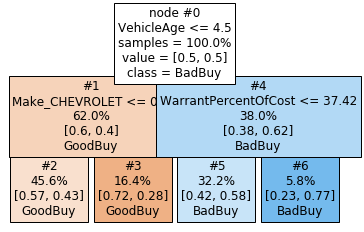

In [104]:
tree.plot_tree(clf2,
              feature_names=feature_cols,
              class_names=['GoodBuy', 'BadBuy'],
              filled=True, precision=2,
              node_ids=True, fontsize=12,
              label = 'root', proportion=True,
              impurity=False)

[Text(167.4, 181.2, 'node #0\nVehicleAge <= 4.5\nsamples = 5233\nvalue = [2616.5, 2616.5]\nclass = BadBuy'),
 Text(83.7, 108.72, '#1\nMake_CHEVROLET <= 0.5\n3243\n[1692.39, 1105.39]\nGoodBuy'),
 Text(41.85, 36.23999999999998, '#2\n2385\n[1228.92, 927.37]\nGoodBuy'),
 Text(125.55000000000001, 36.23999999999998, '#3\n858\n[463.47, 178.02]\nGoodBuy'),
 Text(251.10000000000002, 108.72, '#4\nWarrantPercentOfCost <= 37.42\n1990\n[924.11, 1511.11]\nBadBuy'),
 Text(209.25, 36.23999999999998, '#5\n1684\n[804.68, 1113.67]\nBadBuy'),
 Text(292.95, 36.23999999999998, '#6\n306\n[119.42, 397.44]\nBadBuy')]

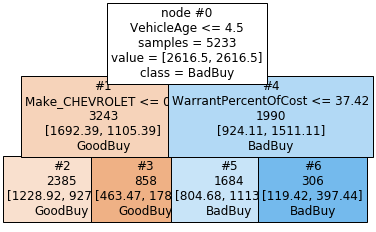

In [105]:
tree.plot_tree(clf2,
              feature_names=feature_cols,
              class_names=['GoodBuy', 'BadBuy'],
              filled=True, precision=2,
              node_ids=True, fontsize=12,
              label = 'root', proportion=False,
              impurity=False)

In [106]:
y_pred = clf2.predict(X_test)

In [107]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [108]:
y_test

5689    0
3934    0
4277    0
3920    0
3204    0
       ..
3001    0
4029    0
7346    1
3406    0
4107    0
Name: IsBadBuy, Length: 2243, dtype: int64

In [109]:
metrics.accuracy_score(y_test, y_pred)

0.6419973250111458

In [110]:
metrics.confusion_matrix(y_test, y_pred)

array([[1260,  678],
       [ 125,  180]], dtype=int64)

In [111]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [112]:
precision = tp/(tp+fp)
precision

0.2097902097902098

In [113]:
recall = tp/(tp+fn)
recall

0.5901639344262295

In [114]:
#print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1938
           1       0.21      0.59      0.31       305

    accuracy                           0.64      2243
   macro avg       0.56      0.62      0.53      2243
weighted avg       0.81      0.64      0.70      2243



In [88]:
#I am not impressed with my model. So, I need to go back in and start making some changes. I will start with usedcar9 before the dummy variables.
usedcar9.columns

Index(['IsBadBuy', 'VehicleAge', 'Make', 'VehOdo', 'Nationality', 'Size',
       'VehBCost', 'WarrantyCost', 'Miles_Per_Year', 'WarrantPercentOfCost',
       'VehicleType', 'Adj_MMR_AvgPrice', 'Model_Condensed',
       'Adj_Price_Difference'],
      dtype='object')

In [89]:
usedcar9.Model_Condensed.value_counts()

OTHER            4880
IMPALA            470
PT CRUISER        382
MALIBU            342
TAURUS            269
SEBRING           261
STRATUS           261
CALIBER           201
COBALT            174
CARAVAN GRAND     125
RAM PICKUP        111
Name: Model_Condensed, dtype: int64

In [90]:
#Since we have Warranty Cost percentage, it's more useful than Warranty cost so I am dropping it.
usedcar9.drop(columns=['Model_Condensed','WarrantyCost'], inplace=True)

In [91]:
usedcar9.Make.value_counts()

CHEVROLET    1770
DODGE        1344
FORD         1133
CHRYSLER      901
OTHER         819
PONTIAC       449
KIA           264
NISSAN        234
SATURN        208
JEEP          183
HYUNDAI       171
Name: Make, dtype: int64

In [92]:
#I need to make the columns a bit more lean. There is significant jump between these and others.
usedcar9['Make'].replace(['PONTIAC', 'KIA', 'NISSAN', 'SATURN', 'JEEP', 'HYUNDAI'], 'OTHER', inplace=True)

In [93]:
usedcar9.Make.value_counts()

OTHER        2328
CHEVROLET    1770
DODGE        1344
FORD         1133
CHRYSLER      901
Name: Make, dtype: int64

In [94]:
usedcar9.T

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
IsBadBuy,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
VehicleAge,4,6,4,5,5,4,6,3,6,3,...,3,5,2,5,3,2,8,4,3,3
Make,FORD,CHEVROLET,CHEVROLET,CHEVROLET,OTHER,DODGE,CHRYSLER,OTHER,CHEVROLET,DODGE,...,DODGE,OTHER,DODGE,CHEVROLET,OTHER,CHRYSLER,OTHER,OTHER,CHRYSLER,OTHER
VehOdo,65805,72132,65925,98130,86889,50308,87008,35796,78412,89849,...,76165,80690,65485,86028,71922,46357,96637,48642,68127,66855
Nationality,AMERICAN,AMERICAN,AMERICAN,AMERICAN,TOP LINE ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,...,AMERICAN,AMERICAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,AMERICAN,OTHER ASIAN,AMERICAN,OTHER ASIAN
Size,MEDIUM,COMPACT,LARGE,VAN,COMPACT,MEDIUM SUV,CROSSOVER,MEDIUM,SMALL SUV,LARGE TRUCK,...,MEDIUM,MEDIUM,SPECIALTY,MEDIUM SUV,MEDIUM,MEDIUM,VAN,MEDIUM,SPECIALTY,MEDIUM
VehBCost,4500,3300,5700,4100,5200,9635,6900,5900,5100,9900,...,5100,4900,9300,7600,4900,6800,4115,5500,7600,8000
Miles_Per_Year,16451.2,12022,16481.2,19626,17377.8,12577,14501.3,11932,13068.7,29949.7,...,25388.3,16138,32742.5,17205.6,23974,23178.5,12079.6,12160.5,22709,22285
WarrantPercentOfCost,18.3333,44.0909,29.8772,136.902,11.4231,11.2714,21.7826,7.83051,22.6471,9.92929,...,22.6471,49.2245,13.0645,16.3553,11.6122,14.3382,143.694,8.76364,15.9868,16.4125
VehicleType,CAR,CAR,CAR,VAN,CAR,SUV,SUV,CAR,SUV,TRUCK,...,CAR,CAR,CAR,SUV,CAR,CAR,VAN,CAR,CAR,CAR


In [95]:
usedcar11 = pd.get_dummies(usedcar9)

In [96]:
usedcar11.head()

,IsBadBuy,VehicleAge,VehOdo,VehBCost,Miles_Per_Year,WarrantPercentOfCost,Adj_MMR_AvgPrice,Adj_Price_Difference,Make_CHEVROLET,Make_CHRYSLER,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,VehicleType_CAR,VehicleType_SUV,VehicleType_TRUCK,VehicleType_VAN
0,0,4,65805,4500.0,16451.25,18.333333,3713.0,-787.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,6,72132,3300.0,12022.00,44.090909,2128.0,-1172.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,4,65925,5700.0,16481.25,29.877193,4107.0,-1593.0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,5,98130,4100.0,19626.00,136.902439,2446.0,-1654.0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,1,5,86889,5200.0,17377.80,11.423077,4522.0,-678.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [125]:
usedcar11.T

,0,1,2,3,4,5,6,7,8,9,...,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476
IsBadBuy,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0000
VehicleAge,4.000000,6.000000,4.000000,5.000000,5.000000,4.000000,6.000000,3.000000,6.000000,3.000000,...,3.000000,5.00000,2.000000,5.000000,3.000000,2.000000,8.000000,4.000000,3.000000,3.0000
VehOdo,65805.000000,72132.000000,65925.000000,98130.000000,86889.000000,50308.000000,87008.000000,35796.000000,78412.000000,89849.000000,...,76165.000000,80690.00000,65485.000000,86028.000000,71922.000000,46357.000000,96637.000000,48642.000000,68127.000000,66855.0000
VehBCost,4500.000000,3300.000000,5700.000000,4100.000000,5200.000000,9635.000000,6900.000000,5900.000000,5100.000000,9900.000000,...,5100.000000,4900.00000,9300.000000,7600.000000,4900.000000,6800.000000,4115.000000,5500.000000,7600.000000,8000.0000
Miles_Per_Year,16451.250000,12022.000000,16481.250000,19626.000000,17377.800000,12577.000000,14501.333333,11932.000000,13068.666667,29949.666667,...,25388.333333,16138.00000,32742.500000,17205.600000,23974.000000,23178.500000,12079.625000,12160.500000,22709.000000,22285.0000
WarrantPercentOfCost,18.333333,44.090909,29.877193,136.902439,11.423077,11.271406,21.782609,7.830508,22.647059,9.929293,...,22.647059,49.22449,13.064516,16.355263,11.612245,14.338235,143.693803,8.763636,15.986842,16.4125
Adj_MMR_AvgPrice,3713.000000,2128.000000,4107.000000,2446.000000,4522.000000,8881.000000,6372.000000,5451.000000,4133.000000,15107.000000,...,4733.000000,3217.00000,7792.000000,6226.000000,3837.000000,5527.000000,2062.000000,3240.000000,8721.000000,7730.0000
Adj_Price_Difference,-787.000000,-1172.000000,-1593.000000,-1654.000000,-678.000000,-754.000000,-528.000000,-449.000000,-967.000000,5207.000000,...,-367.000000,-1683.00000,-1508.000000,-1374.000000,-1063.000000,-1273.000000,-2053.000000,-2260.000000,1121.000000,-270.0000
Make_CHEVROLET,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
Make_CHRYSLER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0000


In [97]:
usedcar11.columns

Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'Miles_Per_Year',
       'WarrantPercentOfCost', 'Adj_MMR_AvgPrice', 'Adj_Price_Difference',
       'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD',
       'Make_OTHER', 'Nationality_AMERICAN', 'Nationality_OTHER',
       'Nationality_OTHER ASIAN', 'Nationality_TOP LINE ASIAN', 'Size_COMPACT',
       'Size_CROSSOVER', 'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK',
       'Size_MEDIUM', 'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN', 'VehicleType_CAR',
       'VehicleType_SUV', 'VehicleType_TRUCK', 'VehicleType_VAN'],
      dtype='object')

In [122]:
feature_cols = ['VehicleAge', 'VehOdo','WarrantPercentOfCost', 
        'Adj_MMR_AvgPrice', 'Adj_Price_Difference',
       'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD',
       'Make_OTHER', 'Nationality_AMERICAN', 'Nationality_OTHER',
       'Nationality_OTHER ASIAN', 'Nationality_TOP LINE ASIAN', 'Size_COMPACT',
       'Size_CROSSOVER', 'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK',
       'Size_MEDIUM', 'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK',
       'Size_SPECIALTY', 'Size_SPORTS', 'Size_VAN', 'VehicleType_CAR',
       'VehicleType_SUV', 'VehicleType_TRUCK', 'VehicleType_VAN']

In [123]:
X=usedcar11[feature_cols]
y=usedcar11.IsBadBuy

In [124]:
X.head()

,VehicleAge,VehOdo,WarrantPercentOfCost,Adj_MMR_AvgPrice,Adj_Price_Difference,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_OTHER,...,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,VehicleType_CAR,VehicleType_SUV,VehicleType_TRUCK,VehicleType_VAN
0,4,65805,18.333333,3713.0,-787.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,6,72132,44.090909,2128.0,-1172.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4,65925,29.877193,4107.0,-1593.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,98130,136.902439,2446.0,-1654.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,5,86889,11.423077,4522.0,-678.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [125]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: IsBadBuy, dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)

In [127]:
X_train.shape

(5233, 30)

In [129]:
y_train.shape

(5233,)

In [130]:
X_test.shape

(2243, 30)

In [161]:
y_test.shape

(2243,)

In [162]:
clf11a = tree.DecisionTreeClassifier(max_depth=2,
                                 class_weight='balanced')

In [163]:
clf11 = clf11a.fit(X_train, y_train)

[Text(167.4, 181.2, 'X[0] <= 4.5\ngini = 0.5\nsamples = 5233\nvalue = [2616.5, 2616.5]'),
 Text(83.7, 108.72, 'X[5] <= 0.5\ngini = 0.478\nsamples = 3243\nvalue = [1692.394, 1105.388]'),
 Text(41.85, 36.23999999999998, 'gini = 0.49\nsamples = 2385\nvalue = [1228.919, 927.367]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.401\nsamples = 858\nvalue = [463.475, 178.021]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 37.418\ngini = 0.471\nsamples = 1990\nvalue = [924.106, 1511.112]'),
 Text(209.25, 36.23999999999998, 'gini = 0.487\nsamples = 1684\nvalue = [804.683, 1113.669]'),
 Text(292.95, 36.23999999999998, 'gini = 0.355\nsamples = 306\nvalue = [119.423, 397.443]')]

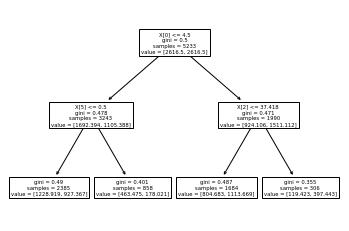

In [164]:
tree.plot_tree(clf11)

[Text(167.4, 181.2, 'node #0\nVehicleAge <= 4.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = BadBuy'),
 Text(83.7, 108.72, '#1\nMake_CHEVROLET <= 0.5\n62.0%\n[0.6, 0.4]\nGoodBuy'),
 Text(41.85, 36.23999999999998, '#2\n45.6%\n[0.57, 0.43]\nGoodBuy'),
 Text(125.55000000000001, 36.23999999999998, '#3\n16.4%\n[0.72, 0.28]\nGoodBuy'),
 Text(251.10000000000002, 108.72, '#4\nWarrantPercentOfCost <= 37.42\n38.0%\n[0.38, 0.62]\nBadBuy'),
 Text(209.25, 36.23999999999998, '#5\n32.2%\n[0.42, 0.58]\nBadBuy'),
 Text(292.95, 36.23999999999998, '#6\n5.8%\n[0.23, 0.77]\nBadBuy')]

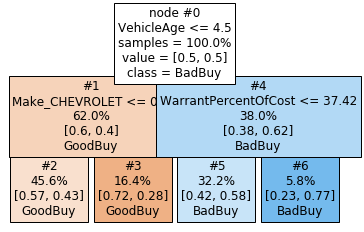

In [165]:
tree.plot_tree(clf11,
              feature_names=feature_cols,
              class_names=['GoodBuy', 'BadBuy'],
              filled=True, precision=2,
              node_ids=True, fontsize=12,
              label = 'root', proportion=True,
              impurity=False)

In [166]:
y_pred= clf11.predict(X_test)

In [167]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [168]:
y_test

5689    0
3934    0
4277    0
3920    0
3204    0
       ..
3001    0
4029    0
7346    1
3406    0
4107    0
Name: IsBadBuy, Length: 2243, dtype: int64

In [169]:
metrics.accuracy_score(y_test, y_pred)

0.6419973250111458

In [170]:
metrics.confusion_matrix(y_test, y_pred)

array([[1260,  678],
       [ 125,  180]], dtype=int64)

In [171]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [172]:
precision = tp/ (tp+fp)
precision

0.2097902097902098

In [173]:
recall = tp/(tp+fn)
recall

0.5901639344262295

In [174]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1938
           1       0.21      0.59      0.31       305

    accuracy                           0.64      2243
   macro avg       0.56      0.62      0.53      2243
weighted avg       0.81      0.64      0.70      2243



[Text(167.4, 181.2, 'node #0\nVehicleAge <= 4.5\nsamples = 5233\nvalue = [2616.5, 2616.5]\nclass = BadBuy'),
 Text(83.7, 108.72, '#1\nMake_CHEVROLET <= 0.5\n3243\n[1692.39, 1105.39]\nGoodBuy'),
 Text(41.85, 36.23999999999998, '#2\n2385\n[1228.92, 927.37]\nGoodBuy'),
 Text(125.55000000000001, 36.23999999999998, '#3\n858\n[463.47, 178.02]\nGoodBuy'),
 Text(251.10000000000002, 108.72, '#4\nWarrantPercentOfCost <= 37.42\n1990\n[924.11, 1511.11]\nBadBuy'),
 Text(209.25, 36.23999999999998, '#5\n1684\n[804.68, 1113.67]\nBadBuy'),
 Text(292.95, 36.23999999999998, '#6\n306\n[119.42, 397.44]\nBadBuy')]

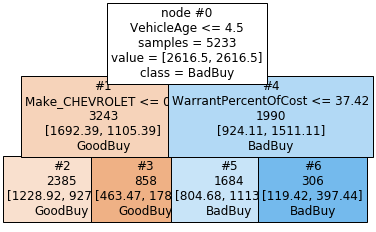

In [175]:
tree.plot_tree(clf11,
              feature_names=feature_cols,
              class_names=['GoodBuy', 'BadBuy'],
              filled=True, precision=2,
              node_ids=True, fontsize=12,
              label = 'root', proportion=False,
              impurity=False)

My first model had 50 columns and I dropped it to 33. They ran the same tree. Then, I changed my test_size and it was still quite close. \
\
If a vehicle is less than 4.5 years old, it's a good buy.\
If less than 4.5 and not a chevy there is a 57% it is good\
if less than 4.5 and a chevy it's a 72% chance it's good buy.\
\
If it is more than 4.5 years old it's a bad buy\
If more than 4.5yo and the warranty% is less than  or equal to 37.42% then there's a 58% chance it will be a bad buy\
If more than 4.5 yo and the warranty% is more than 37.42 then there's 77% chance it will be a bad buy.\
